# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #Make API request
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | ingleby greenhow
Processing Record 3 of Set 1 | matli
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | pledran
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | briceni
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | murzuq
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | dukhan
Processing Record 15 of Set 1 | calasparra
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | chibougamau
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | port mathurin
Pr

Processing Record 36 of Set 4 | sitka
Processing Record 37 of Set 4 | hayden
Processing Record 38 of Set 4 | launceston
Processing Record 39 of Set 4 | tucuma
Processing Record 40 of Set 4 | pyay
Processing Record 41 of Set 4 | vytegra
Processing Record 42 of Set 4 | sevlievo
Processing Record 43 of Set 4 | yibin
Processing Record 44 of Set 4 | konibodom
Processing Record 45 of Set 4 | kasongo-lunda
Processing Record 46 of Set 4 | patterson
Processing Record 47 of Set 4 | shar
Processing Record 48 of Set 4 | mwene-ditu
Processing Record 49 of Set 4 | georgetown
Processing Record 0 of Set 5 | salinopolis
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | etawah
Processing Record 3 of Set 5 | ust'-ilimsk
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | flying fish cove
Processing Record 6 of Set 5 | pierre
Processing Record 7 of Set 5 | laayoune plage
City not found. Skipping...
Processing Record 8 of Set 5 | severo-yeniseyskiy
Processing Record 9 of 

Processing Record 28 of Set 8 | ouani
Processing Record 29 of Set 8 | porto novo
Processing Record 30 of Set 8 | susuman
Processing Record 31 of Set 8 | rozhyshche
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | walvis bay
Processing Record 34 of Set 8 | semey
Processing Record 35 of Set 8 | jian'ou
Processing Record 36 of Set 8 | huatabampo
Processing Record 37 of Set 8 | north battleford
Processing Record 38 of Set 8 | san-pedro
Processing Record 39 of Set 8 | bolotnoye
Processing Record 40 of Set 8 | warmbad
Processing Record 41 of Set 8 | gorodoviki
Processing Record 42 of Set 8 | valera
Processing Record 43 of Set 8 | tommot
Processing Record 44 of Set 8 | altay
Processing Record 45 of Set 8 | semdinli
Processing Record 46 of Set 8 | akonolinga
Processing Record 47 of Set 8 | myski
Processing Record 48 of Set 8 | palmer
Processing Record 49 of Set 8 | bayramaly
Processing Record 0 of Set 9 | retreat
Processing Record 1 of Set 9 | coahuayana de hidalg

Processing Record 19 of Set 12 | yanjiang
Processing Record 20 of Set 12 | ugoofaaru
Processing Record 21 of Set 12 | portage la prairie
Processing Record 22 of Set 12 | valday
Processing Record 23 of Set 12 | tevragh zeina
City not found. Skipping...
Processing Record 24 of Set 12 | rania
Processing Record 25 of Set 12 | zacharo
Processing Record 26 of Set 12 | upington
Processing Record 27 of Set 12 | gunjur
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alice springs,-23.7000,133.8833,20.75,28,0,3.09,AU,1710616635
1,ingleby greenhow,54.4498,-1.1069,8.41,85,100,7.15,GB,1710616635
2,matli,25.0431,68.6557,25.47,20,0,1.92,PK,1710616636
3,port-aux-francais,-49.3500,70.2167,6.05,85,99,11.95,TF,1710616637
4,adamstown,-25.0660,-130.1015,25.54,82,43,5.63,PN,1710616497


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,20.75,28,0,3.09,AU,1710616635
1,ingleby greenhow,54.4498,-1.1069,8.41,85,100,7.15,GB,1710616635
2,matli,25.0431,68.6557,25.47,20,0,1.92,PK,1710616636
3,port-aux-francais,-49.3500,70.2167,6.05,85,99,11.95,TF,1710616637
4,adamstown,-25.0660,-130.1015,25.54,82,43,5.63,PN,1710616497


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

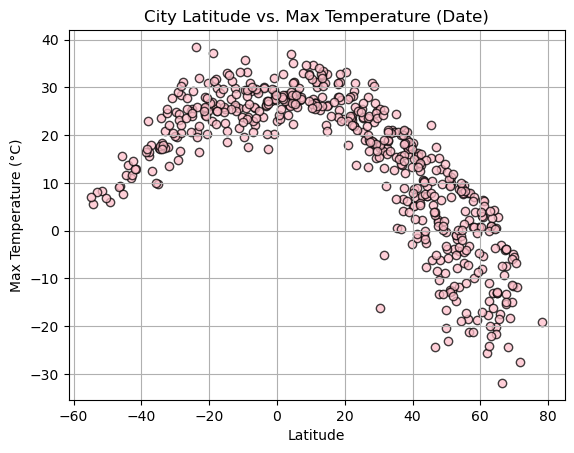

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", color="pink", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

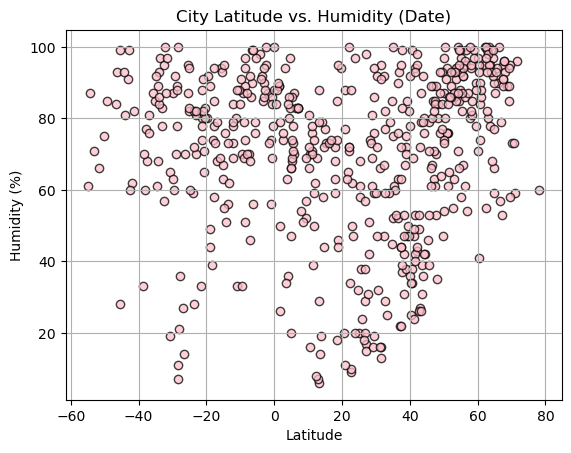

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", color="pink", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

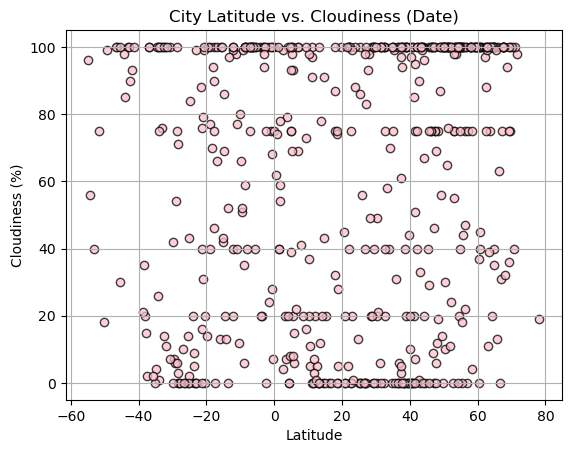

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", color="pink", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

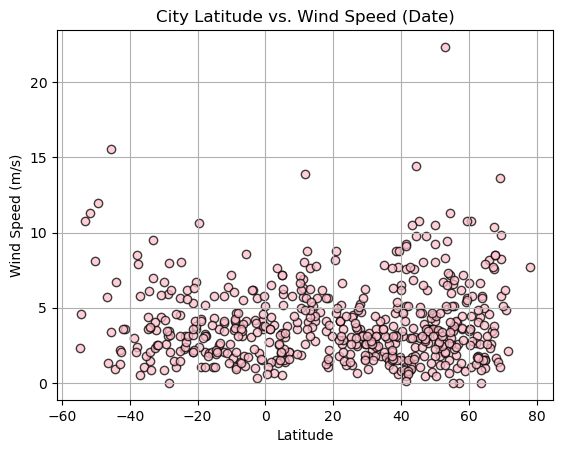

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", color="pink", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create scatter plot
    plt.scatter(x_data, y_data, color='pink', edgecolors='black', alpha=0.75)
    
    # Add best fit line
    plt.plot(x_data, intercept + slope * x_data, color='red', label='Linear Regression')
    
    # Output linear regression info
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard error: {std_err}")
    
    # Set up x and y axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Show legend
    plt.legend()
    
    # Return the axes object for the plots, in case any changes need to be made
    return plt.gca()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ingleby greenhow,54.4498,-1.1069,8.41,85,100,7.15,GB,1710616635
2,matli,25.0431,68.6557,25.47,20,0,1.92,PK,1710616636
5,pledran,48.4500,-2.7500,12.82,80,75,3.60,FR,1710616638
6,hawaiian paradise park,19.5933,-154.9731,23.28,94,100,3.09,US,1710616638
7,ribeira grande,38.5167,-28.7000,17.22,67,40,8.75,PT,1710616639


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,20.75,28,0,3.09,AU,1710616635
3,port-aux-francais,-49.3500,70.2167,6.05,85,99,11.95,TF,1710616637
4,adamstown,-25.0660,-130.1015,25.54,82,43,5.63,PN,1710616497
12,invercargill,-46.4000,168.3500,9.45,93,100,1.34,NZ,1710616642
15,grytviken,-54.2811,-36.5092,5.48,87,56,4.57,GS,1710616644


###  Temperature vs. Latitude Linear Regression Plot

Slope: -0.6905689850770127
Intercept: 36.7466970838574
R-squared: 0.7371120366788787
P-value: 2.5076724280733736e-114
Standard error: 0.02096380861383401


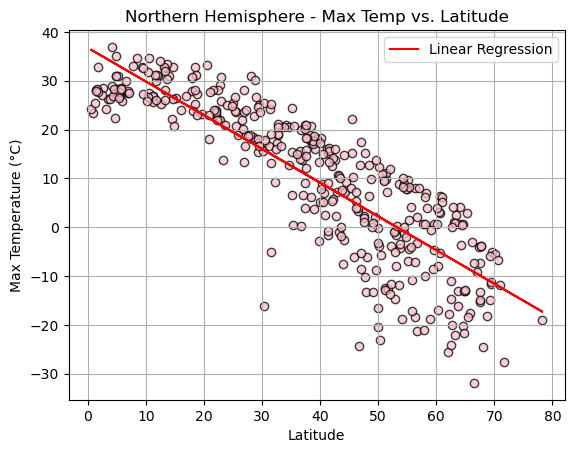

In [19]:
# Linear regression on Northern Hemisphere
axes = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - Max Temp vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_MaxTemp_vs_Latitude.png")

# Show plot
plt.show()

Slope: 0.346648124860977
Intercept: 30.491326934059085
R-squared: 0.5049425367966307
P-value: 1.6197084248248187e-26
Standard error: 0.026967344009398368


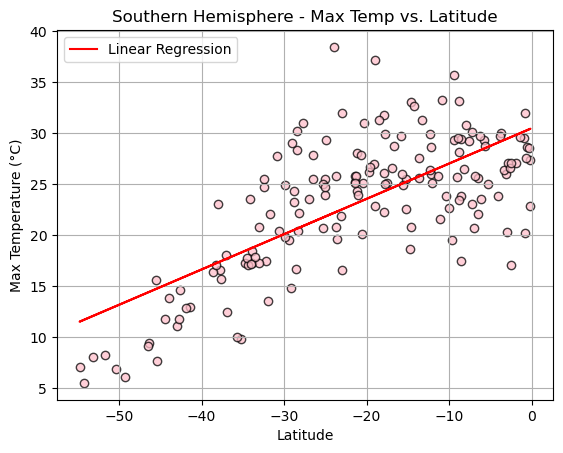

In [20]:
# Linear regression on Southern Hemisphere
axes = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Max Temp vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_MaxTemp_vs_Latitude.png")

# Show plot
plt.show()

# **Discussion about the linear relationship:** You can see that in the Northern Hemisphere, the temperature values decrease as the latitude goes up while in the Southern Hemiphere, the temperature values increase as the latitude goes up.

### Humidity vs. Latitude Linear Regression Plot

Slope: 0.4318226303743388
Intercept: 52.38566352426209
R-squared: 0.12195722858425054
P-value: 1.3405556772735714e-12
Standard error: 0.05889846529229091


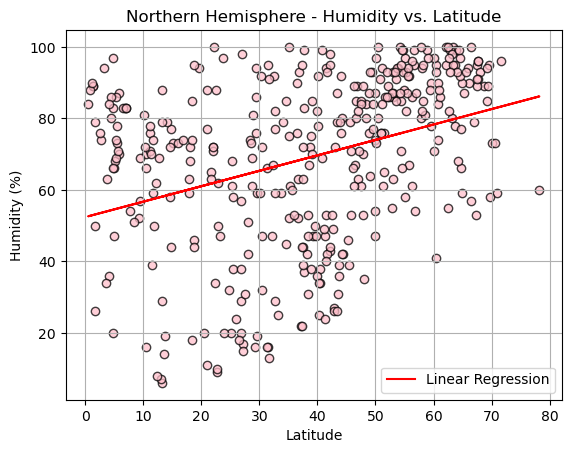

In [21]:
# Linear regression on Northern Hemisphere
axes = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

Slope: 0.16919175319316426
Intercept: 78.54013897062731
R-squared: 0.013875553606323004
P-value: 0.13304475831316434
Standard error: 0.11206303653677338


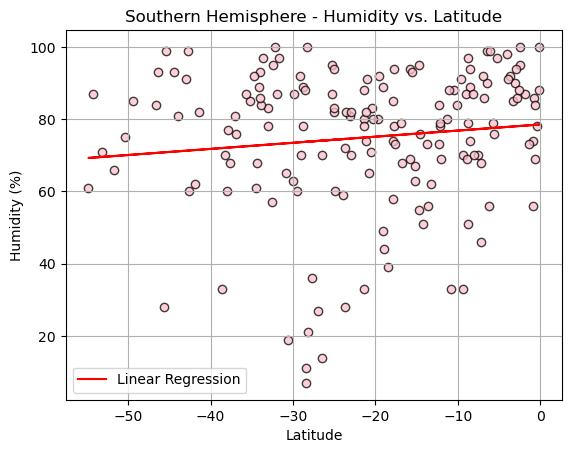

In [22]:
# Linear regression on Southern Hemisphere
axes = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

# **Discussion about the linear relationship:** Humidity increases in both Hemispheres as the latitude goes up. The humidity doesn't increase as much in the Southern Hemisphere as it does in the Northern Hemisphere given the latitude increase.

### Cloudiness vs. Latitude Linear Regression Plot

Slope: 0.5969084115456343
Intercept: 37.71205655873108
R-squared: 0.07945851397269682
P-value: 1.541814558011612e-08
Standard error: 0.10327701567374996


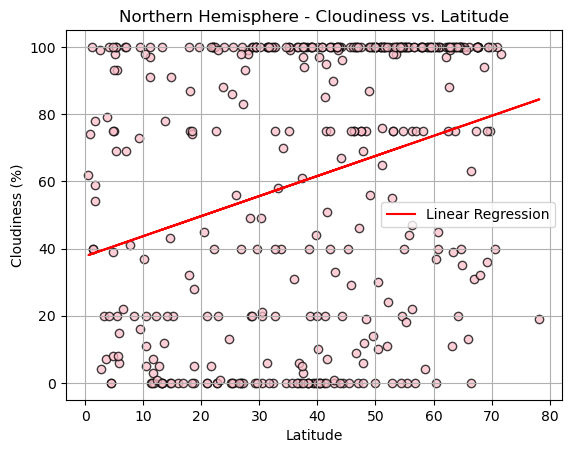

In [23]:
# Linear regression on Northern Hemisphere
axes = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

Slope: 0.36718508747966927
Intercept: 66.72676853874674
R-squared: 0.016181342090304734
P-value: 0.10455282244475016
Standard error: 0.22494574632684342


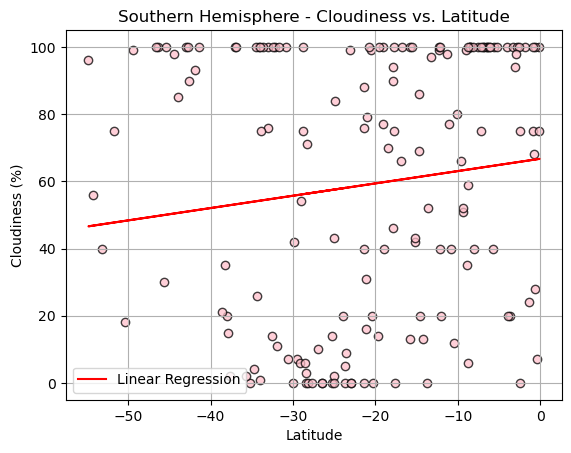

In [24]:
# Linear regression on Southern Hemisphere
axes = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

# **Discussion about the linear relationship:** Cloudiness appears to go up in both Hemispheres but doesn't appear to go up as much in the Southern Hemisphere based on the increase of latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Slope: 0.011495398505117358
Intercept: 3.516091790772634
R-squared: 0.006920323177113363
P-value: 0.10136039368228578
Standard error: 0.006999989809254038


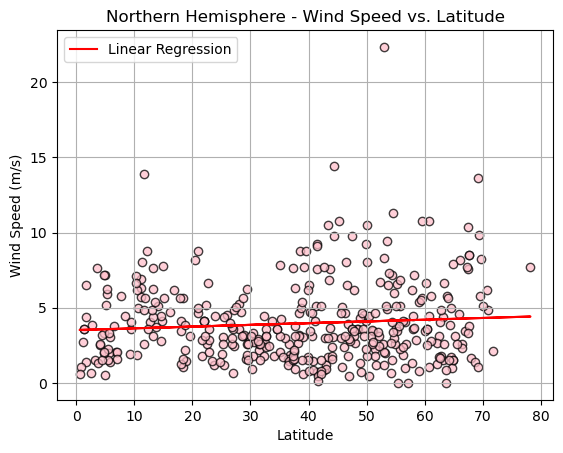

In [25]:
# Linear regression on Northern Hemisphere
axes = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_WindSpeed_vs_Latitude.png")

# Show plot
plt.show()

Slope: -0.04002579070120094
Intercept: 2.9342999998108583
R-squared: 0.051660073504889034
P-value: 0.0034240763529720373
Standard error: 0.013473701467583388


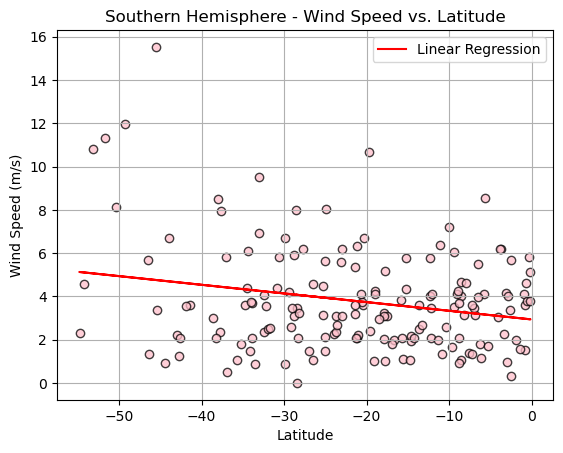

In [26]:
# Linear regression on Southern Hemisphere
axes = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude")

# Customize the dots to be pink
scatter = axes.collections[0]
scatter.set_facecolor('pink')

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_WindSpeed_vs_Latitude.png")

# Show plot
plt.show()

# **Discussion about the linear relationship:** The wind speed in the Northern Hemisphere appears stagnant. Meanwhile, the wind speed in the Southern Hemisphere drops as the latitude goes up.